In [27]:
import pandas as pd
import datetime as dt
import pandas_datareader.data as web

import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import os
import quandl

In [28]:
start = dt.datetime(2018,1,1)



stockList = ['^BVSP','PETR4.SA']

df = pd.DataFrame()
df_aux = pd.DataFrame()
for i in stockList:
    df_aux = web.DataReader(i, 'yahoo', start)
    nome_coluna = []
    for x in df_aux.columns:
        nome_coluna.append(str(i)+'_'+str(x))
    df_aux.columns=nome_coluna
    df = pd.concat([df, df_aux], axis=1)

In [29]:
df.head()

,^BVSP_High,^BVSP_Low,^BVSP_Open,^BVSP_Close,^BVSP_Volume,^BVSP_Adj Close,PETR4.SA_High,PETR4.SA_Low,PETR4.SA_Open,PETR4.SA_Close,PETR4.SA_Volume,PETR4.SA_Adj Close
Date,,,,,,,,,,,,
2018-01-02,77909,76403,76403,77891,2880300,77891,16.549999,16.190001,16.190001,16.549999,33461800.0,15.793664
2018-01-03,78414,77602,77889,77995,3142200,77995,16.719999,16.370001,16.490000,16.700001,55940900.0,15.936812
2018-01-04,79135,77998,77998,78647,3486100,78647,16.959999,16.620001,16.780001,16.730000,37064900.0,15.965438
2018-01-05,79071,78218,78644,79071,2747100,79071,16.860001,16.570000,16.700001,16.830000,26958200.0,16.060867
2018-01-08,79395,78631,79070,79379,2550800,79379,17.030001,16.709999,16.740000,17.030001,28400000.0,16.251730


In [30]:
num_days = 1
df['prediction'] = df['PETR4.SA_Adj Close'].shift(-num_days)
df.dropna(inplace=True)

In [31]:
X = df.drop(['prediction'], 1)
#Y = np.array(df['prediction'])
#X_proc = preprocessing.scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, df['prediction'], test_size=0.8)

In [32]:
df['prediction'].head()

Date
2018-01-02    15.936812
2018-01-03    15.965438
2018-01-04    16.060867
2018-01-05    16.251730
2018-01-08    16.251730
Name: prediction, dtype: float64

In [34]:
#Performing the Regression on the training data
clf = RandomForestRegressor()
clf.fit(X_train, Y_train)
prediction = (clf.predict(X))

print('Score train {}'.format(clf.score(X_train,Y_train)))
print('Score test {}'.format(clf.score(X_test,Y_test)))
print('Score full {}'.format(clf.score(X,df['prediction'])))

Score train 0.9947656117420413
Score test 0.9636679202578141
Score full 0.9700589313946347


C:\Users\renan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [35]:
df['pred'] = prediction
df['prediction'] = df['prediction'].shift(+num_days)
df['pred'] = df['pred'].shift(+num_days)
df['Data'] = df.index
df.tail()

,^BVSP_High,^BVSP_Low,^BVSP_Open,^BVSP_Close,^BVSP_Volume,^BVSP_Adj Close,PETR4.SA_High,PETR4.SA_Low,PETR4.SA_Open,PETR4.SA_Close,PETR4.SA_Volume,PETR4.SA_Adj Close,prediction,pred,Data
Date,,,,,,,,,,,,,,,
2019-08-02,103180,101667,102122,102674,4923500,102674,26.889999,26.280001,26.370001,26.520000,64112900.0,26.520000,26.520000,25.638170,2019-08-02
2019-08-05,102658,99630,102658,100098,5000400,100098,26.129999,25.520000,25.799999,25.549999,48277000.0,25.549999,25.549999,26.286238,2019-08-05
2019-08-06,102178,100098,100098,102164,5074800,102164,26.219999,25.680000,25.900000,25.879999,44208100.0,25.879999,25.879999,25.690528,2019-08-06
2019-08-07,102784,100476,102163,102782,5570600,102782,25.730000,25.000000,25.440001,25.600000,67698500.0,25.600000,25.600000,25.636333,2019-08-07
2019-08-08,104282,102811,102811,104115,5538300,104115,26.350000,25.860001,26.100000,26.350000,50256700.0,26.350000,26.350000,25.831863,2019-08-08


C:\Users\renan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


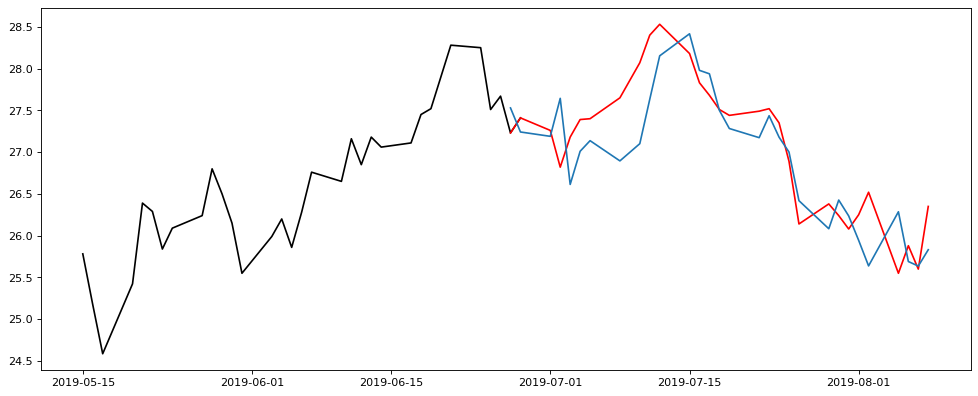

In [36]:
last_x_days = 30
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df['Data'].iloc[-last_x_days*2:-last_x_days+2], df['PETR4.SA_Adj Close'].iloc[-last_x_days*2:-last_x_days+2], color = 'black')
plt.plot(df['Data'].iloc[-last_x_days:], df['prediction'].iloc[-last_x_days:], color = 'red')
plt.plot(df['Data'].iloc[-last_x_days:], df['pred'].iloc[-last_x_days:])
plt.show()